In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def rho(r,d,w,t,e=1e-1,q=1e-2):       
    if np.linalg.norm(r-d/2*np.array([0,0,1], float))<e:
        return q*(1/E**3)*np.cos(w*t)
    elif np.linalg.norm(r+d/2*np.array([0,0,1], float))<e:  
        return -q*(1/E**3)*np.cos(w*t)       
    else:                  
        return 0

In [24]:
def j(r,d,w,t,e=1e-5, q = 1e-2):  
    if np.sqrt(r[0]**2+r[1]**2)<e and -d/2+e/2<r[2]<d/2-e/2:   
        return -4/3*w*q*np.sin(w*t)*np.array([0,0,1], float)/e**2   
    else:                 
        return np.zeros(3)

In [4]:
import scipy.integrate

In [5]:
#scipy.integrate.tplquad?

In [31]:
#d>>E#q<<1
d = 1
w = np.pi
e = 1e-1
c = 299792458.0
epsilon_0= 8.85418e-12
mu_0 = 1
#mu_0 = 4*np.pi*e-7

In [7]:
Rho = lambda r,t: rho(np.array([r[2],r[1],r[0]],float),d,w,t)
J = lambda r,t: j(np.array([r[2],r[1],r[0]], float),d,w,t)

In [8]:
def phi_integrand(rho, r, r_p, t, epsilon=1e-8):    
    if np.linalg.norm(r-r_p) < epsilon:           
        return 0        
    else:           
        return (1/(4*np.pi*epsilon_0))*((rho(r_p,t-np.linalg.norm(r-r_p)/c))/np.linalg.norm(r-r_p)) 
def A_integrand(j,r,r_p,t, epsilon=1e-8):               
        if np.linalg.norm(r-r_p) < epsilon:         
            return np.zeros(3)       
        else:             
            return mu_0/(4*np.pi)*(j(r_p,t-np.linalg.norm(r-r_p)/c))/np.linalg.norm(r-r_p)
                    

In [9]:
def phi(r,t):    
    return scipy.integrate.tplquad(lambda x,y,z: phi_integrand(Rho, r, np.array([x,y,z], float), t),          
                                   -np.inf,                                                  
                                   np.inf,                                                   
                                   lambda x: -np.inf,                                        
                                   lambda x: np.inf,                                         
                                   lambda x,y: -np.inf,                                     
                                   lambda x,y: np.inf                                          
                                  )
def A(r,t):       
    return np.array([scipy.integrate.tplquad(lambda x,y,z: A_integrand(J, r, np.array([x,y,z], float), t)[i],       
                                             -np.inf,                                                      
                                             np.inf,                       
                                             lambda x: -np.inf,   
                                             lambda x: np.inf,    
                                             lambda x,y: -np.inf, 
                                             lambda x,y: np.inf   
                                            )  for i in range(3)],float)

In [10]:
A_integrand(J,np.array([1e-5,1e-5,1e-1]),np.array([0,0,0], float), 2)

array([  0.        ,   0.        , 440.12760624])

In [11]:
scipy.integrate.tplquad(lambda x,y,z:0,-np.inf,np.inf, 
                        lambda x: -np.inf,             
                        lambda x: np.inf,              
                        lambda x,y: -np.inf,  
                        lambda x,y: np.inf)

(0.0, 0)

In [12]:
A(np.array([1,2,3], float),0.5)

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [13]:
#import matplotlib.pyplot as pltfig, ax = plt.subplots()

In [14]:
j(np.array([0,0,0.00064371],float),d,w,0.5)

array([-0.0000000e+00, -0.0000000e+00, -4.1887902e+08])

In [15]:
J(np.array([0,0,0], float), 0.5)

array([-0.0000000e+00, -0.0000000e+00, -4.1887902e+08])

In [16]:
# scipy.integrate.tplquad(lambda z,y,x: np.exp(-x**2-y**2-z**2),                               
#                         -np.inf,                                                       
#                         np.inf,                                                        
#                         lambda x: -np.inf,                                             
#                         lambda x: np.inf,                                              
#                         lambda x,y: -np.inf,                                           
#                         lambda x,y: np.inf                                                          )

(5.568327996830832, 2.1783512372855034e-08)

In [17]:
# np.array([scipy.integrate.tplquad(lambda x,y,z: np.exp(-x**2-y**2-z**2),  
#                                   -np.inf,                                                                                                        np.inf,                                                                                                    lambda x: -np.inf,                                                                                         lambda x: np.inf,                                                                                           lambda x,y: -np.inf,                                                                                         lambda x,y: np.inf                                                                                             )  for i in range(3)],float)

array([[5.56832800e+00, 2.17835124e-08],
       [5.56832800e+00, 2.17835124e-08],
       [5.56832800e+00, 2.17835124e-08]])

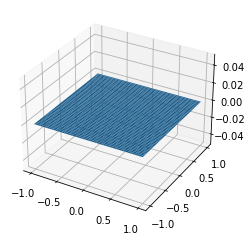

In [18]:
import matplotlib.pyplot as plt
x, y = np.meshgrid(np.arange(-1,1,0.01), np.arange(-1,1,0.01))
ax = plt.subplot(projection='3d')
f = np.vectorize(lambda x,y:phi_integrand(Rho,np.array([1,1,1], float),np.array([x,y,d/2],float),0.5),signature="(),()->()")
ax.plot_surface(x,y,f(x,y))

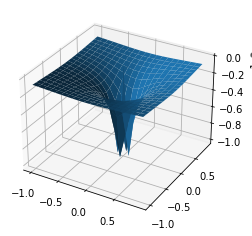

In [42]:
import matplotlib.pyplot as plt
x, y = np.meshgrid(np.arange(-1,1,0.1), np.arange(-1,1,0.1))
ax = plt.subplot(projection='3d')
f = np.vectorize(lambda x,y:A_integrand(J,np.array([x,y,0], float),np.zeros(3),0.1)[2],signature="(),()->()")
ax.plot_surface(x,y,f(x,y))

In [20]:
# x, y = np.meshgrid(np.arange(-0.5,0.5,0.25), np.arange(-0.5,0.5,0.25))
# ax = plt.subplot(projection='3d')
# f = np.vectorize(lambda x,y:A(np.array([x,y,0], float),0.5)[2][0],signature="(),()->()")
# ax.plot_surface(x,y,f(x,y))

In [33]:
def A(r,t):       
    return np.array([scipy.integrate.tplquad(lambda x,y,z: A_integrand(J, r, np.array([x,y,z], float), t)[i],       
                                             -1,                                                      
                                             1,                       
                                             lambda x: -1,   
                                             lambda x: 1,    
                                             lambda x,y: -1, 
                                             lambda x,y: 1   
                                            )  for i in range(3)],float)

In [32]:
A(np.array([0.1,0.1,0.1], float),0.5)

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.01514778]])

In [56]:
A_integrand(J,np.array([1,1,10], float),np.zeros(3),0.5)

array([      -0.        ,       -0.        , -3300491.80992223])

In [67]:
%matplotlib qt
from matplotlib.animation import FuncAnimation
x, y = np.meshgrid(np.arange(-1,1,0.1), np.arange(-1,1,0.1))
fig = plt.figure()
ax = plt.subplot(projection='3d')
f = np.vectorize(lambda x,y,t:A_integrand(J,np.array([x,y,0], float),np.zeros(3),t)[2]*1e-8,signature="(),(),()->()")
def update(t):
    ax.clear()
    ax.plot_surface(x,y,f(x,y,t))
    ax.set_zlim(-1,1)
anim = FuncAnimation(fig,update, frames=np.linspace(0,2,60*4), interval=1/60)
anim.save("a.gif")

In [44]:
ani.save()

array(-5947034.49734032)